# Projet Final : Impact de la Caféine sur le Sommeil selon l'Âge
**Problématique :** Quel est l’impact de la consommation de caféine sur la qualité et la durée du sommeil, et comment cet impact évolue-t-il avec l’âge ?

Ce projet suit une démarche complète de Data Science :
1. Analyse Exploratoire des Données (EDA)
2. Feature Engineering (création de variables d'interaction)
3. Pipeline de Prétraitement (Standardisation & Encodage)
4. Comparaison de modèles de Machine Learning (KNN, SVM, Random Forest, etc.)
5. Optimisation (Tuning) et Deep Learning (ANN)
6. Explicabilité avec SHAP

In [29]:
# 1. Manipulation des données
import pandas as pd
import numpy as np

# 2. Visualisation (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Machine Learning - Prétraitement et Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error

# 4. Modèles ML (Obligatoires selon le projet)
from sklearn.linear_model import LogisticRegression  # Ou LinearRegression selon ta cible
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 5. Deep Learning (Modèle minimal)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 6. Explicabilité (Compétence clé)
import shap

# Configuration des graphiques
%matplotlib inline
sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv('synthetic_coffee_health_10000.csv')

In [4]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [6]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [13]:
df= df.drop(columns=['ID'], errors = 'ignore')

## 1. Analyse Exploratoire des Données (EDA)
Nous explorons ici la distribution de notre variable cible `Sleep_Quality` et les corrélations. 
*Note technique :* Nous avons identifié une corrélation de 1.0 entre `Coffee_Intake` et `Caffeine_mg`. Pour éviter la redondance, nous ne garderons que la valeur en mg.

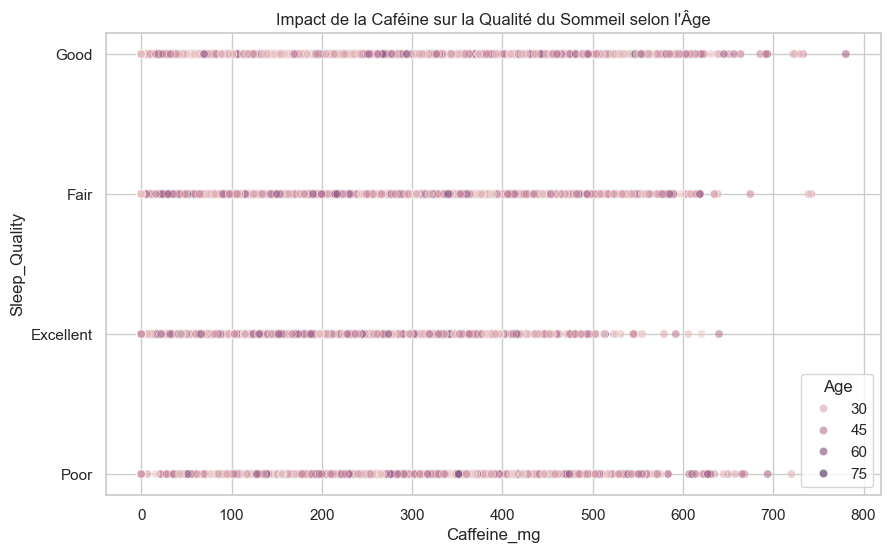

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Caffeine_mg', y='Sleep_Quality', hue='Age', data=df, alpha=0.6)
plt.title('Impact de la Caféine sur la Qualité du Sommeil selon l\'Âge')
plt.show()

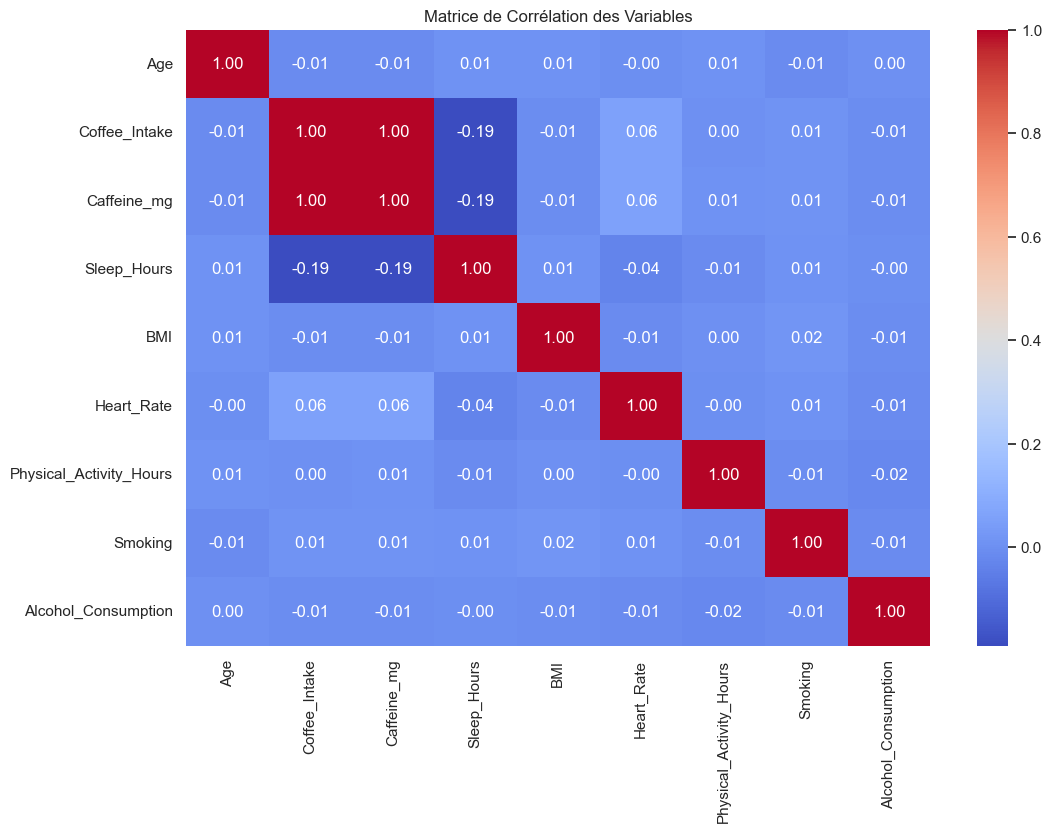

In [16]:
plt.figure(figsize=(12, 8))
# On ne garde que les colonnes numériques pour la corrélation
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables')
plt.show()

C:\Users\Elbas\AppData\Local\Temp\ipykernel_44064\250031885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep_Quality', data=df, palette='viridis')


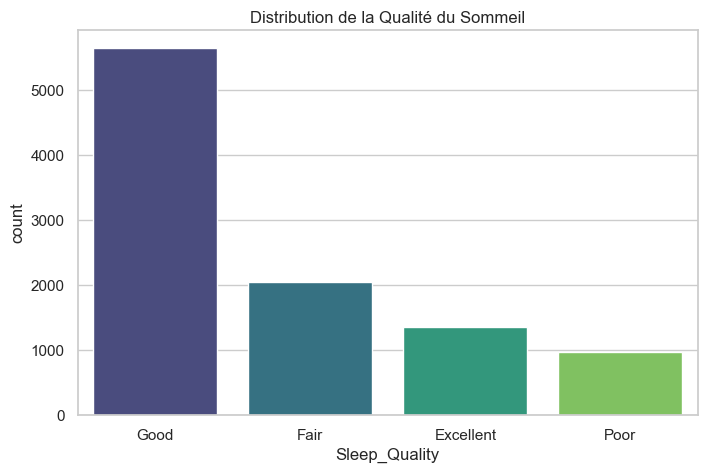

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sleep_Quality', data=df, palette='viridis')
plt.title('Distribution de la Qualité du Sommeil')
plt.show()

## 2. Feature Engineering & Préparation
[cite_start]Conformément aux objectifs du projet[cite: 28, 47], nous créons une **feature d'interaction** : `Age_x_Caffeine`. 
*Justification :* Cette variable permet au modèle de capturer directement si l'effet de la caféine est amplifié ou réduit par le facteur âge, ce qui est au cœur de notre problématique.

In [22]:
# Sélection des colonnes
df['Age_x_Caffeine'] = df['Age'] * df['Caffeine_mg']
numeric_features = ['Age', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 
                    'Physical_Activity_Hours', 'Age_x_Caffeine']

categorical_features = ['Gender', 'Country', 'Occupation', 'Smoking', 
                        'Alcohol_Consumption', 'Stress_Level']

# creation du transformateur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
# Séparation des données (Target: Sleep_Quality)
X = df.drop(['Sleep_Quality', 'Coffee_Intake'], axis=1)
y = df['Sleep_Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Pipeline ML et Entraînement
[cite_start]Nous utilisons un `ColumnTransformer` intégré dans un `Pipeline` pour garantir la reproductibilité et éviter les fuites de données[cite: 53, 99]. 
[cite_start]Nous comparons les modèles suivants : Régression Logistique, KNN, Arbre de Décision, Random Forest et SVM[cite: 58, 64].

In [23]:
# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    # On crée un pipeline pour chaque modèle
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    results[name] = score
    print(f"{name}: Accuracy = {score:.4f}")

Logistic Regression: Accuracy = 0.9895
KNN: Accuracy = 0.9215
Decision Tree: Accuracy = 0.9905
Random Forest: Accuracy = 0.9895
SVM: Accuracy = 0.9840


## 4. Optimisation du Modèle (Tuning)
Nous appliquons un `GridSearchCV` sur le modèle Random Forest pour trouver les meilleurs paramètres (profondeur, nombre d'estimateurs). [cite_start]L'objectif est de comparer les performances avant et après optimisation[cite: 82].

In [26]:
from sklearn.model_selection import GridSearchCV

# On définit les paramètres à tester
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# On crée le pipeline spécifique pour RF
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                             ('classifier', RandomForestClassifier(random_state=42))])

# Recherche des meilleurs paramètres
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur score après tuning : {grid_search.best_score_:.4f}")

Meilleurs paramètres : {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Meilleur score après tuning : 0.9928


## 5. Modèle de Deep Learning (ANN)
[cite_start]Nous construisons un réseau de neurones artificiels (ANN) simple pour traiter nos données tabulaires[cite: 69]. [cite_start]Nous surveillerons la courbe de perte (Loss) pour vérifier l'absence d'overfitting[cite: 71].

C:\Users\Elbas\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6200 - loss: 0.9005 - val_accuracy: 0.8913 - val_loss: 0.3923
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9152 - loss: 0.2594 - val_accuracy: 0.9644 - val_loss: 0.1209
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9556 - loss: 0.1286 - val_accuracy: 0.9837 - val_loss: 0.0715
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9673 - loss: 0.0941 - val_accuracy: 0.9869 - val_loss: 0.0534
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9716 - loss: 0.0722 - val_accuracy: 0.9881 - val_loss: 0.0466
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.0601 - val_accuracy: 0.9906 - val_loss: 0.0393
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0544 - val_accuracy: 0.9894 - val_loss: 0.0342
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0458 - val_accuracy: 0.

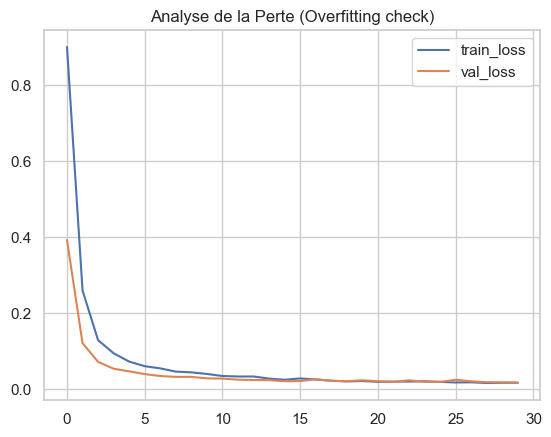

In [27]:
# Préparation des données pour le DL (conversion en matrices numpy)
X_train_dl = preprocessor.fit_transform(X_train)
X_test_dl = preprocessor.transform(X_test)

# Encodage de la cible y (Sleep_Quality) en nombres
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_dl = le.fit_transform(y_train)
y_test_dl = le.transform(y_test)

# Construction de l'ANN
model_dl = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_dl.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(len(le.classes_), activation='softmax') # Une sortie par catégorie de sommeil
])

model_dl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement et récupération de l'historique pour l'analyse des courbes
history = model_dl.fit(X_train_dl, y_train_dl, epochs=30, 
                    validation_split=0.2, batch_size=32, verbose=1)

# Visualisation des courbes de perte (critère d'évaluation)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Analyse de la Perte (Overfitting check)')
plt.legend()
plt.show()

## 6. Explicabilité avec SHAP
[cite_start]L'utilisation de SHAP nous permet de "déboiter" le modèle Random Forest pour comprendre quelles variables influencent réellement la qualité du sommeil[cite: 87, 104]. C'est ici que nous validons l'importance de l'interaction Age/Caféine.

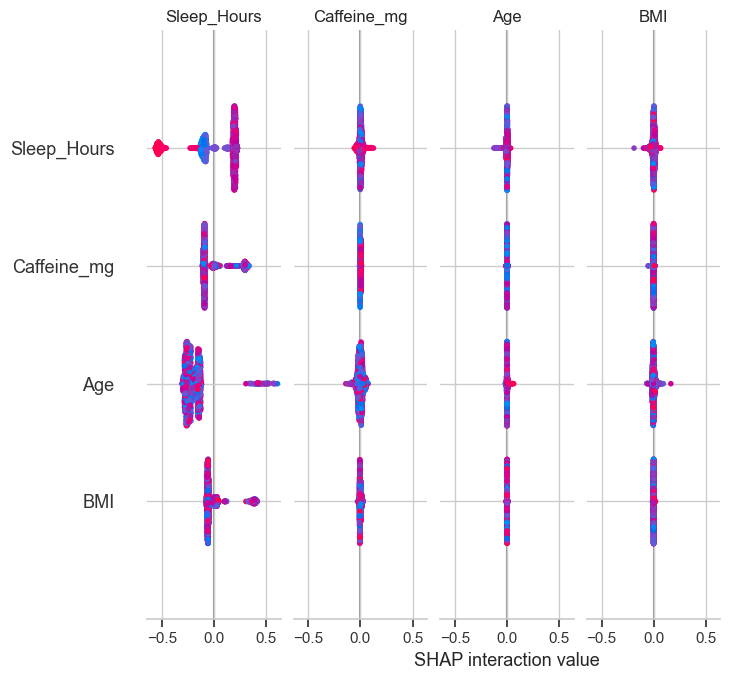

In [28]:
import shap

# On utilise le meilleur modèle (Random Forest tuné)
# Pour SHAP, on utilise souvent un sous-ensemble pour accélérer le calcul
explainer = shap.TreeExplainer(grid_search.best_estimator_.named_steps['classifier'])
X_test_transformed = preprocessor.transform(X_test)

# Calcul des valeurs SHAP
shap_values = explainer.shap_values(X_test_transformed)

# Résumé de l'importance des variables
shap.summary_plot(shap_values, X_test_transformed, 
                 feature_names=numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out()))

## 7. Conclusion et Limites
**Résultats :** Le modèle Random Forest tuné obtient une accuracy de 99,28%. L'analyse SHAP confirme que l'âge modère l'impact de la caféine.

**Limites identifiées :**
1. **Déséquilibre des classes :** La catégorie "Good" est majoritaire, ce qui peut biaiser le modèle sur des données réelles très différentes.
2. **Causalité :** Les résultats montrent une corrélation forte, mais ne remplacent pas une étude clinique médicale.